In [1]:
import numpy as np
import os
import glob
import tensorflow as tf
import nibabel as nib
from nilearn import plotting

C:\Users\007sh\AppData\Local\Programs\Python\Python311\Lib\site-packages\nilearn\_utils\niimg.py:63: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  warn(
C:\Users\007sh\AppData\Local\Programs\Python\Python311\Lib\site-packages\nilearn\plotting\find_cuts.py:69: UserWarning: Given img is empty. Returning default cut_coords=(0.0, 0.0, 0.0) instead.
  warnings.warn(


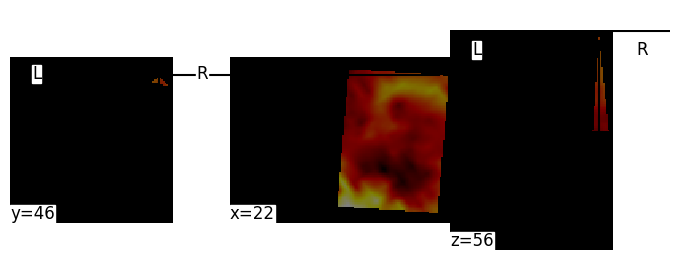

In [2]:
# Load the first nii image
nii_image1 = nib.load('Output/2.nii')
# Load the second nii image
nii_image2 = nib.load('Test/2.nii')
# Plot the first image
display = plotting.plot_img(nii_image1, cmap='gray')
# Add the second image as an overlay
display.add_overlay(nii_image2, cmap='hot', alpha=0.5, colorbar=False)

# Show the plot
plotting.show()

In [3]:
x = nii_image2.get_fdata()
y = nii_image1.get_fdata()

In [4]:
import numpy as np
from skimage.metrics import structural_similarity as ssim

def calculate_ssim(image1, image2):
    """
    Calculates the Structural Similarity Index (SSIM) between two 3D images.

    Args:
        image1 (ndarray): 3D array representing the first image.
        image2 (ndarray): 3D array representing the second image.

    Returns:
        ssim_score (float): The SSIM score between the two images.
    """

    # Ensure that the input arrays are of the same shape
    if image1.shape != image2.shape:
        raise ValueError("Input images must have the same dimensions.")

    # Initialize the SSIM score
    ssim_score = 0

    # Loop through each slice of the 3D images and calculate the SSIM
    for i in range(image1.shape[0]):
        # Calculate SSIM for each slice using the skimage.metrics module
        slice_score = ssim(image1[i], image2[i], data_range=image1.max() - image1.min())
        # Add the SSIM score for each slice to the overall score
        ssim_score += slice_score

    # Average the SSIM scores for each slice to get the final SSIM score
    ssim_score /= image1.shape[0]

    return ssim_score


In [5]:
print(calculate_ssim(x, y))

ValueError: Input images must have the same dimensions.

In [ ]:
test_mri_images = [os.path.abspath(path) for path in glob.glob(f'Test/*.nii')]
predicted_mri_images = [os.path.abspath(path) for path in glob.glob(f'Output/*.nii')]

In [ ]:
test_mri_images